In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.use( 'tkagg' )
import librosa as rosa
import sounddevice as sd
import scipy.signal as ss

import os
import sys

sys.path.append("..")
from src import AudioData
from src import utils

In [2]:
speech = AudioData(os.path.join(os.getcwd(), '../Exercise2', 'AudioFiles', 'speech1.wav'))
phone = AudioData(os.path.join(os.getcwd(), '../Exercise2', 'AudioFiles', 'phone.wav'), sampling_freq_hz=8000)

Successfully loaded audio data from file: /home/p0w3r/gitrepos/ssp20/notebooks/../Exercise2/AudioFiles/speech1.wav
Successfully loaded audio data from file: /home/p0w3r/gitrepos/ssp20/notebooks/../Exercise2/AudioFiles/phone.wav


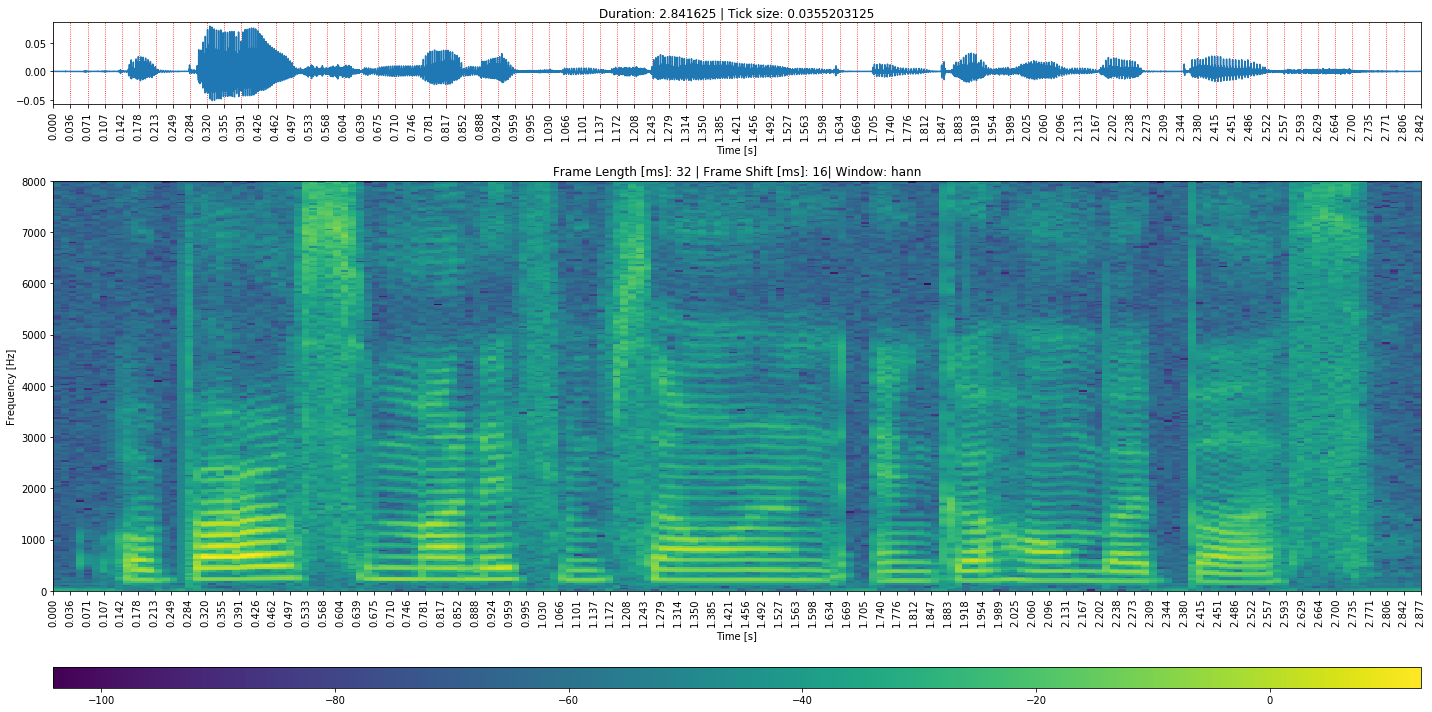

In [3]:
frame_length_ms = 32
frame_shift_ms = 16
stft, freq_axis, frame_centers_ms = speech.compute_stft(frame_length_ms, frame_shift_ms)
speech.plot_stft(stft, freq_axis, frame_centers_ms, frame_length_ms, frame_shift_ms)

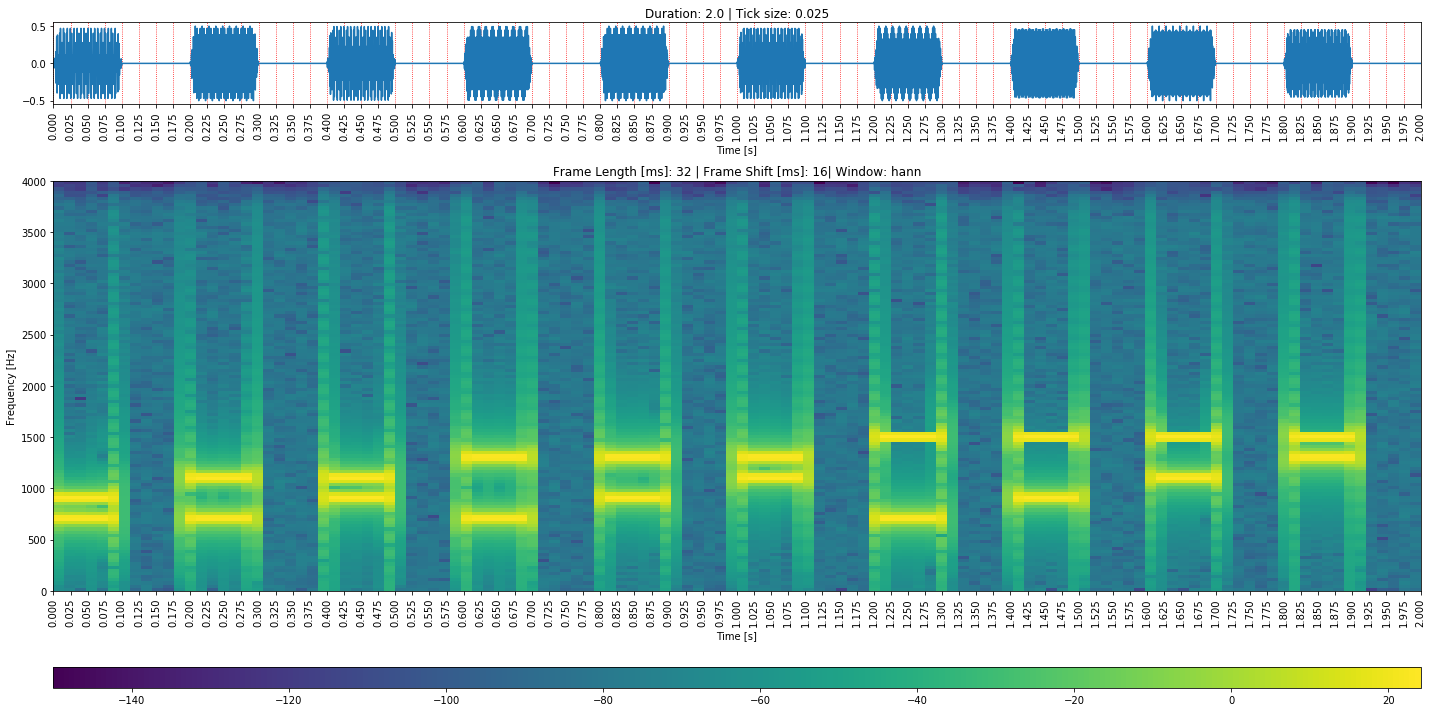

In [4]:
frame_length_ms = 32
frame_shift_ms = 16
stft, freq_axis, frame_centers_ms = phone.compute_stft(frame_length_ms, frame_shift_ms)
phone.plot_stft(stft, freq_axis, frame_centers_ms, frame_length_ms, frame_shift_ms)

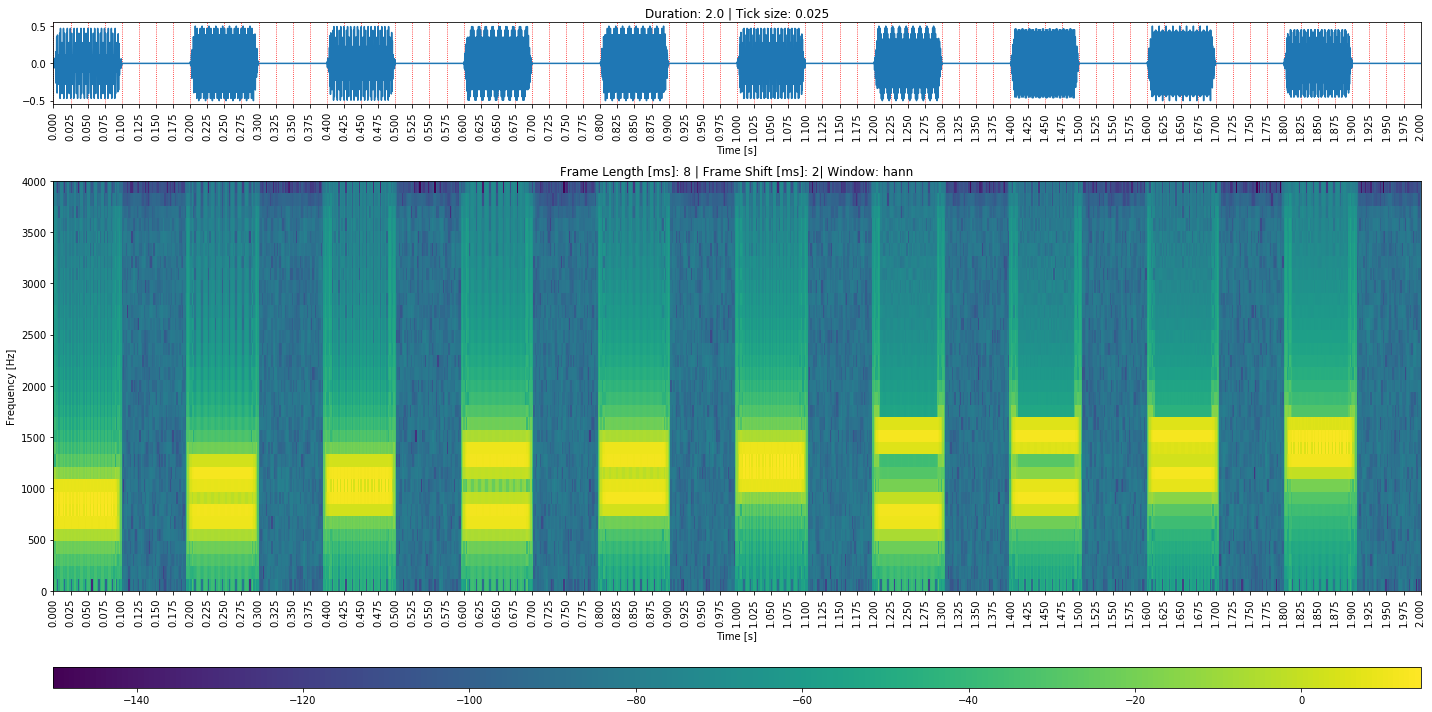

In [5]:
frame_length_ms = 8
frame_shift_ms = 2
stft, freq_axis, frame_centers_ms = phone.compute_stft(frame_length_ms, frame_shift_ms)
phone.plot_stft(stft, freq_axis, frame_centers_ms, frame_length_ms, frame_shift_ms)

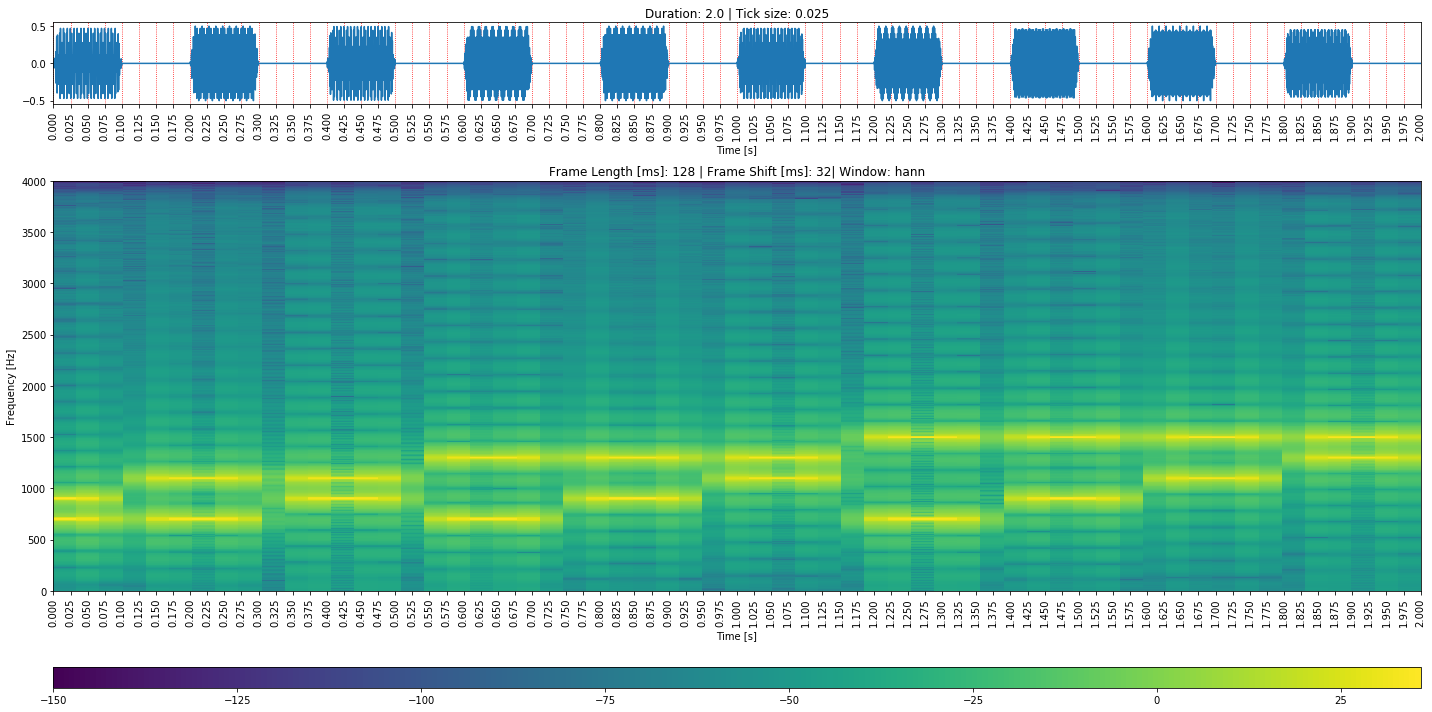

In [6]:
frame_length_ms = 128
frame_shift_ms = 32
stft, freq_axis, frame_centers_ms = phone.compute_stft(frame_length_ms, frame_shift_ms)
phone.plot_stft(stft, freq_axis, frame_centers_ms, frame_length_ms, frame_shift_ms)

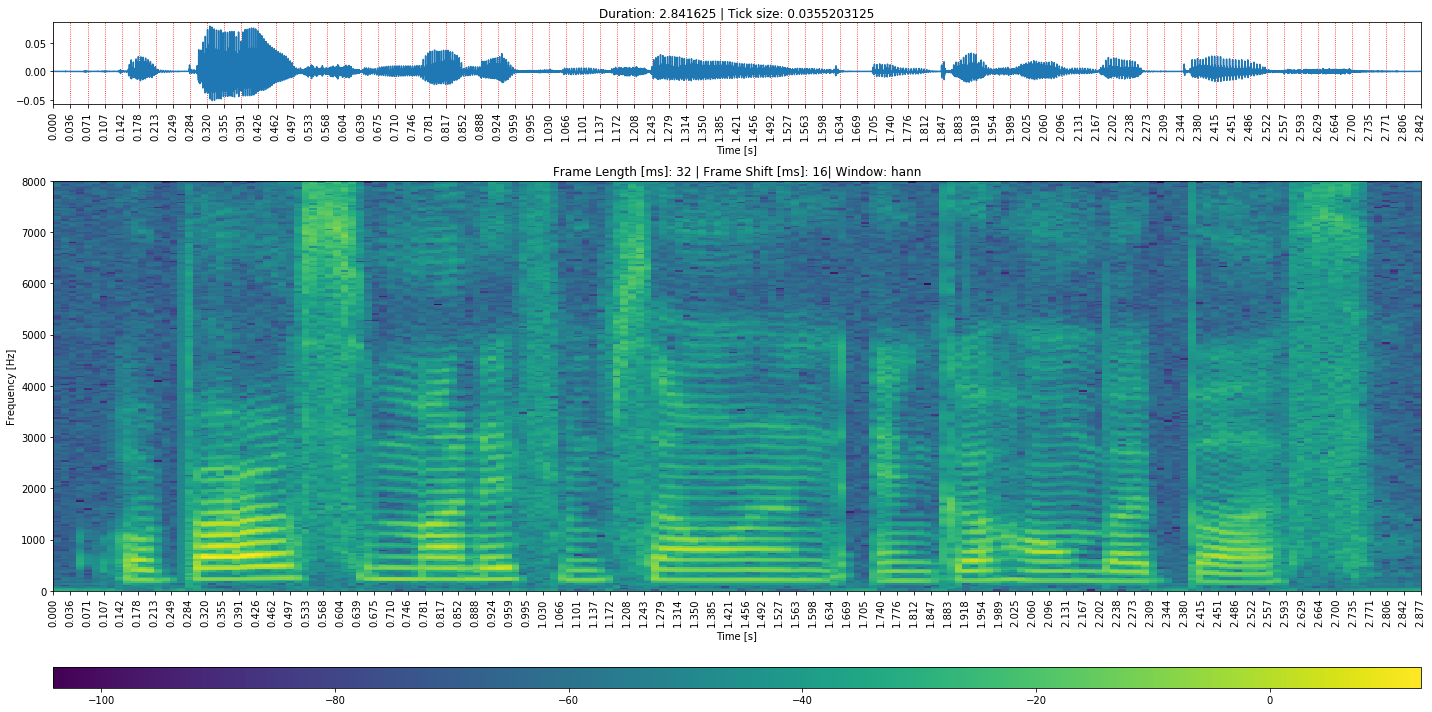

In [7]:
frame_length_ms = 32
frame_shift_ms = 16
stft, freq_axis, frame_centers_ms = speech.compute_stft(frame_length_ms, frame_shift_ms)
fig, axs = speech.plot_stft(stft, freq_axis, frame_centers_ms, frame_length_ms, frame_shift_ms, return_plot=True)


eff1 = speech.estimate_fundamental_freq()
t = np.linspace(0, speech.duration_s, len(eff1))
eff_plot = axs[1].plot(t, eff1, color='r', linewidth=.75)
axs[1].legend((eff_plot), (['Estimated fundamental frequency and the interger multiples']) , loc='upper right', shadow=True)
for i in range(2, 11):
    axs[1].plot(t, eff1 * i, color='r', linewidth=.75)
    
fig.savefig('eff.png')



# Synthesis from the STFT domain (Inverse STFT)

In [8]:
test_signal = AudioData(data=np.ones(2048), sampling_freq_hz=16000)

Successfully loaded audio data!


In [9]:
frame_length_ms = 32
frame_shift_ms = 16
stft, freq_axis, frame_centers_ms = test_signal.compute_stft(frame_length_ms, frame_shift_ms, window_name='sqrt_hann')

In [10]:
window = ss.get_window('hann', test_signal.ms_to_idx(frame_length_ms), fftbins=True)
window = np.sqrt(window)
signal = utils.compute_istft(stft, test_signal.sampling_freq, frame_shift_ms, window)

Successfully loaded audio data!


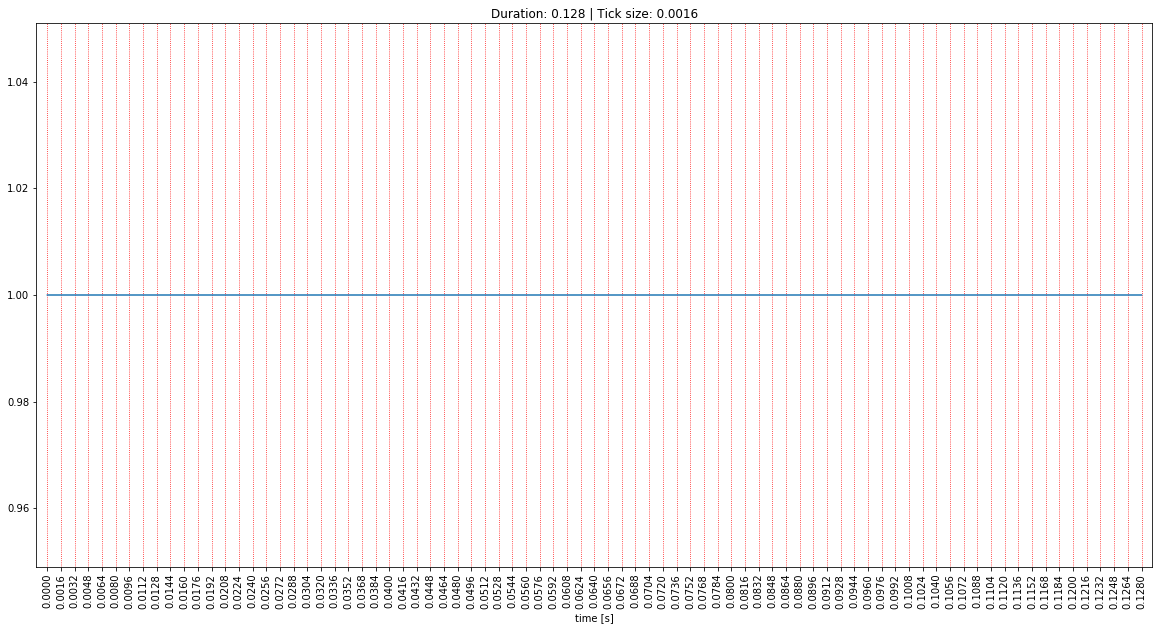

In [11]:
test_signal.plot()

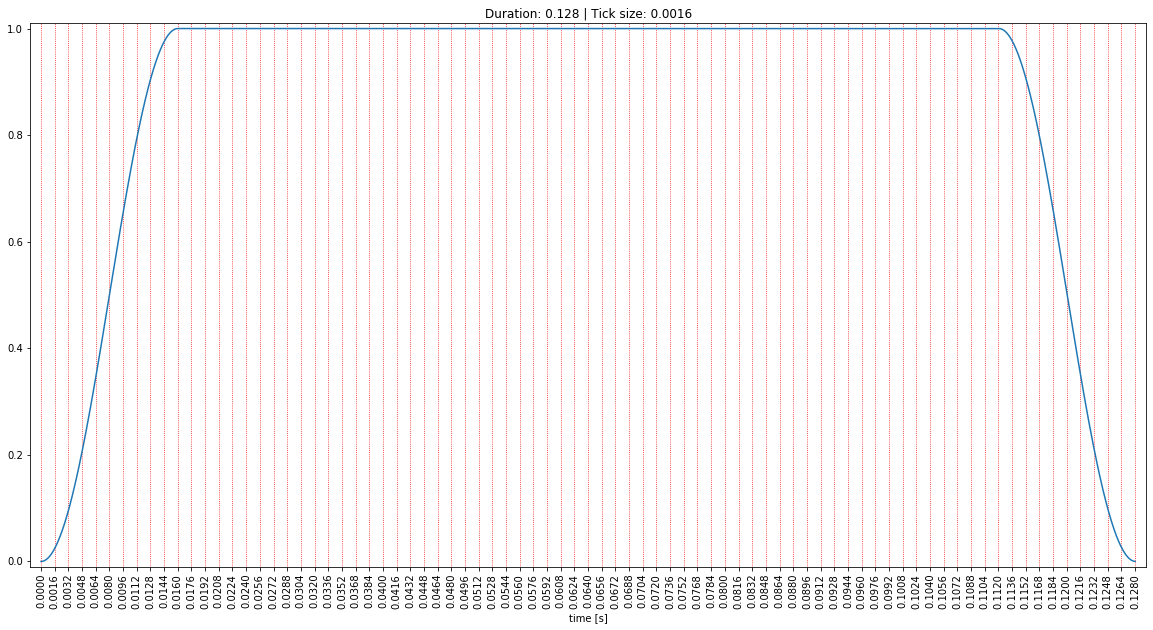

In [12]:
signal.plot()

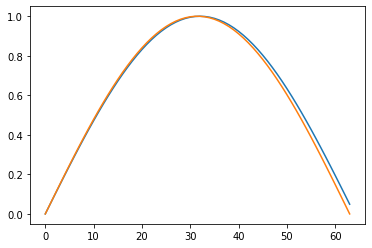

In [20]:
window = ss.get_window('hann', test_signal.ms_to_idx(frame_length_ms // 8), fftbins=True)
window = np.sqrt(window)
plt.plot(window)
window = ss.get_window('hann', test_signal.ms_to_idx(frame_length_ms // 8), fftbins=False)
window = np.sqrt(window)
plt.plot(window)